## 加载数据

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 观察整体数据集

In [2]:
# 训练数据的维度
train_images.shape

(60000, 28, 28)

In [3]:
# 训练标签的维度
train_labels.shape

(60000,)

In [4]:
# 测试数据的维度
test_images.shape

(10000, 28, 28)

In [5]:
# 测试标签的维度
test_labels.shape

(10000,)

## 观察单个数据样本

In [6]:
train_images[0].shape

(28, 28)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

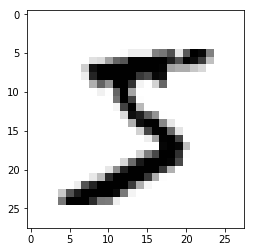

In [8]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(train_images[0], cmap=matplotlib.cm.binary)

In [9]:
train_labels[0]

5

## 数据预处理

首先我们要将 60000 个 28 * 28 像素的图片全部扁平化成一个 784 维的向量（于是得到了 60000 个 784 维的向量），并且使得每个值介于 0 到 1 之间（之前是 0~255）。

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

然后将标签数据进行 one-hot 编码。例如一个标签的值为 `5`，那么它就会变成 `(0, 0, 0, 0, 0, 1, 0, 0, 0, 0)`。

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 搭建神经网络

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 开始训练

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 13us/step - loss: 0.6114 - acc: 0.8465
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.3304 - acc: 0.9083
Epoch 3/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.3013 - acc: 0.9166
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.2877 - acc: 0.9197
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.2801 - acc: 0.9220


## 评估模型

In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 12us/step


In [27]:
print('测试准确率:', test_acc)

测试准确率: 0.9248


我们来专门检查一下第 667 个测试样本。

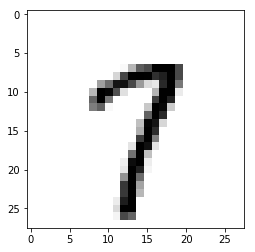

In [19]:
test_image = test_images[666]

plt.imshow(test_image.reshape((28, 28)), cmap=matplotlib.cm.binary)

In [20]:
prediction = network.predict(test_images)[666]

print(prediction)
print('预测结果:', prediction.argmax())

[1.16166973e-06 5.28157907e-05 1.82262247e-05 2.01193063e-04
 1.66214842e-04 1.59770585e-04 1.07831411e-07 8.87632310e-01
 6.93976122e-04 1.11074306e-01]
预测结果: 7


([<matplotlib.axis.XTick at 0x12530bf60>,
 <a list of 10 Text xticklabel objects>)

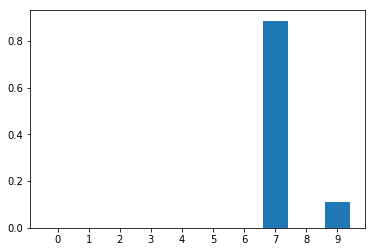

In [21]:
import numpy as np

plt.bar(np.arange(10), prediction)
plt.xticks(np.arange(10), [x for x in range(10)])

## 神经网络 2.0

In [23]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
network2.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [25]:
network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2526 - acc: 0.9269
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1031 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0673 - acc: 0.9802
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0499 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0366 - acc: 0.9895


In [28]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 23us/step


In [29]:
print('测试准确率:', test_acc)

测试准确率: 0.9779


In [30]:
prediction = network2.predict(test_images)[666]

print(prediction)
print('预测结果:', prediction.argmax())

[2.5315977e-08 1.2003612e-04 2.1958479e-06 9.2105394e-05 9.7685593e-09
 1.3967677e-07 2.5953538e-11 9.9950111e-01 1.0572557e-05 2.7372970e-04]
预测结果: 7


([<matplotlib.axis.XTick at 0x133267a90>,
 <a list of 10 Text xticklabel objects>)

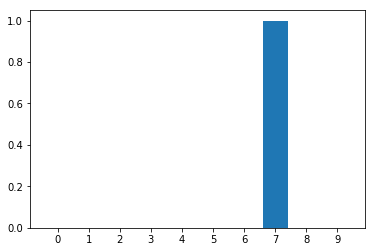

In [31]:
plt.bar(np.arange(10), prediction)
plt.xticks(np.arange(10), [x for x in range(10)])

## 卷积神经网络

图像识别中的大boss。

In [41]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [42]:
convnet = models.Sequential()

convnet.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
convnet.add(layers.MaxPooling2D((2, 2)))
convnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
convnet.add(layers.MaxPooling2D((2, 2)))
convnet.add(layers.Conv2D(64, (3, 3), activation='relu'))
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation='relu'))
convnet.add(layers.Dense(10, activation='softmax'))

In [43]:
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                36928     
__________

In [44]:
convnet.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
convnet.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 23s 383us/step - loss: 0.1655 - acc: 0.9484
Epoch 2/5
60000/60000 [==============================] - 25s 418us/step - loss: 0.0482 - acc: 0.9845
Epoch 3/5
60000/60000 [==============================] - 23s 389us/step - loss: 0.0353 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 32s 538us/step - loss: 0.0277 - acc: 0.9918
Epoch 5/5
60000/60000 [==============================] - 27s 453us/step - loss: 0.0229 - acc: 0.9934


In [46]:
test_loss, test_acc = convnet.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 119us/step


In [47]:
print('测试准确率:', test_acc)

测试准确率: 0.9913
